<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Ejercicio de clasificación con titanic dataset

Ejemplo de clasificación utilizando el dataset de titanic<br>

v1.1

In [1]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Recolectar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline1.png" width="1000" align="middle">

In [2]:
if os.access('titanic.csv', os.F_OK) is False:
    if platform.system() == 'Windows':
        !curl https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/titanic.csv > titanic.csv
    else:
        !wget titanic.csv https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/titanic.csv

--2024-03-20 13:41:19--  http://titanic.csv/
Resolving titanic.csv (titanic.csv)... failed: Name or service not known.
wget: unable to resolve host address ‘titanic.csv’
--2024-03-20 13:41:19--  https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/titanic.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61194 (60K) [text/plain]
Saving to: ‘titanic.csv’

titanic.csv         100%[===================>]  59.76K  --.-KB/s    in 0.007s  

2024-03-20 13:41:19 (7.82 MB/s) - ‘titanic.csv’ saved [61194/61194]

FINISHED --2024-03-20 13:41:19--
Total wall clock time: 0.3s
Downloaded: 1 files, 60K in 0.007s (7.82 MB/s)


### `titanic.csv`:
El dataset **`titanic.csv`** contiene datos sobre los pasajeros que estuvieron en el titanic y si finalmente sobrevivieron o nó al viaje.<br>
- **Passengerid** --> id del pasajero, ejemplo 5
- **Survived** --> sobrevivió? 1(Si), 0(No)
- **Pclass** --> clase (1, 2, 3)
- **Name** --> nombre
- **Sex** --> genero, ejemplo male(masculino), female(femenino)
- **Age** --> edad
- **Siblings** --> Hermanos y esposas/esposos abordo
- **Parch** --> Hijos abordo
- **Ticket** --> Nº de ticket
- **Fare** --> tarifa del ticket
- **Cabine** --> Nº de cabina
- **Embarked** --> Puerto de embarque (C = Cherbourg; Q = Queenstown; S = Southampton)


# Procesar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline2.png" width="1000" align="middle">

In [6]:
# Alumno, realice una inspeccion del dataset en búsqueda de elementos faltantes
df = pd.read_csv('titanic.csv')
elementos_faltantes = df.isnull()
resumen_faltantes = elementos_faltantes.sum()



In [7]:
# Alumno, inspeccione el dataset, visualice las columnas que posee y sus primeras filas
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
# Alumno, del dataset original cree uno nuevo pero
# unicamente con las siguientes columnas:
# Survived, Pclass, Sex, Age, SibSp, Parch
df_original = pd.read_csv('titanic.csv')
columnas_seleccionadas = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch']
df_nuevo = df_original[columnas_seleccionadas]
df_nuevo.head()


,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [10]:
# Alumno, elimine aquellas filas que tengan columnas vacias
df_sin_filas_vacias = df_nuevo.dropna()


In [11]:
# Fin de la limpieza, alumno especifique cuantas filas se poseen para analizar
df_sin_filas_vacias.shape[0]

714

# Explorar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline3.png" width="1000" align="middle">

In [12]:
# Alumno, inspeccione el dataset, visualice las columnas que posee y sus primeras filas
df_sin_filas_vacias.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [14]:
# Alumno: Explorar que tan balanceado está el dataset,
# determinar cuantas personas sobrivivieron o nó
recuento_sobrevivientes = df_sin_filas_vacias['Survived'].value_counts()
recuento_sobrevivientes

0    424
1    290
Name: Survived, dtype: int64

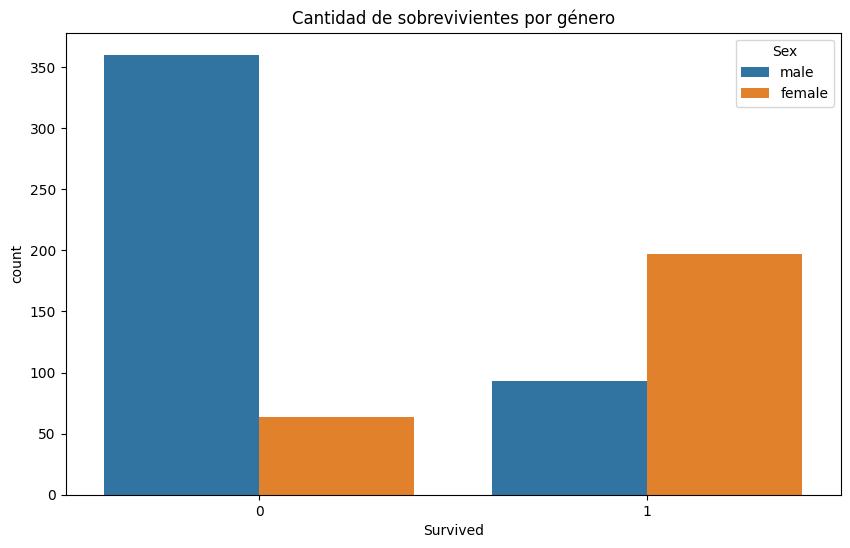

In [15]:
# Alumno: Determinar cuantas personas sobrevivieron
# diferenciando por género
# Utilice el gráfico de seaborn countplot con hue="Sex"
plt.figure(figsize=(10, 6)) # Opcional: Ajusta el tamaño del gráfico
sns.countplot(x='Survived', hue='Sex', data=df_sin_filas_vacias)
plt.title('Cantidad de sobrevivientes por género') # Opcional: Añade un título al gráfico
plt.show()


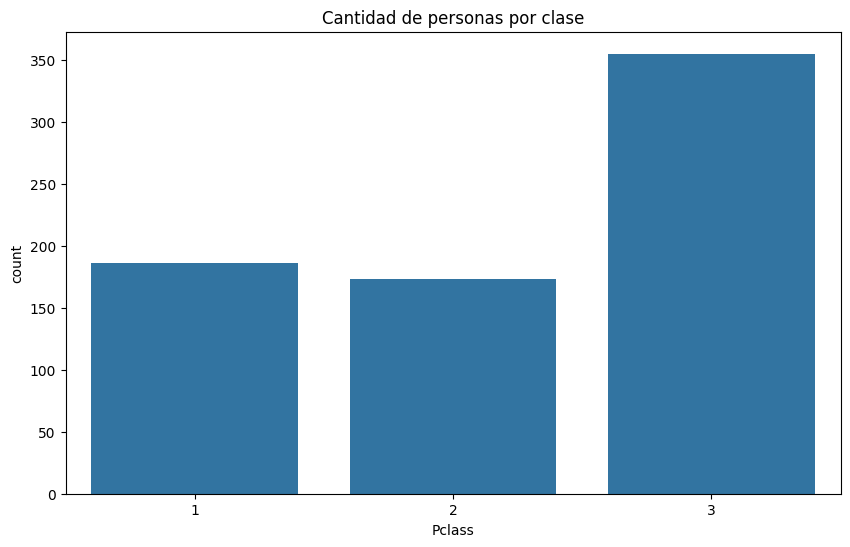

In [16]:
# Alumno: Determinar cuantas personas había de cada clase
# Utilice el gráfico de seaborn countplot
plt.figure(figsize=(10, 6)) # Opcional: Ajusta el tamaño del gráfico
sns.countplot(x='Pclass', data=df_sin_filas_vacias)
plt.title('Cantidad de personas por clase') # Opcional: Añade un título al gráfico
plt.show()


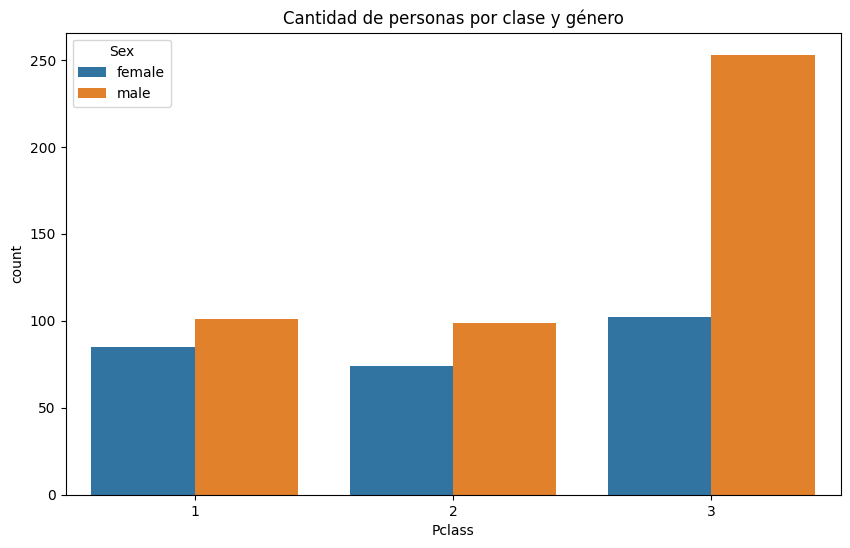

In [18]:
# Alumno: Determinar cuantas personas había de cada clase
# diferenciando por género
# Utilice el gráfico de seaborn countplot con hue="Sex"
plt.figure(figsize=(10, 6)) # Opcional: Ajusta el tamaño del gráfico
sns.countplot(x='Pclass', hue='Sex', data=df_sin_filas_vacias)
plt.title('Cantidad de personas por clase y género') # Opcional: Añade un título al gráfico
plt.show()


#### Transformar variables categóricas texto a clases numeradas

In [21]:
from sklearn.preprocessing import LabelEncoder

In [19]:
# Alumno, cree un dataset df_cod como copia del que viene trabajando
df_cod = df_sin_filas_vacias.copy()


In [22]:
# Utiliza el LabelEncoder para codificar la columna Sex, remplazando
# esa columna por la nueva en el dataset nuevo que acaba de generar
# Recuerde conservar el encoder!
# Crear una instancia de LabelEncoder
le_sex = LabelEncoder()

# Codificar la columna 'Sex'
df_cod['Sex'] = le_sex.fit_transform(df_cod['Sex'])
df_cod.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,1,22.0,1,0
1,1,1,0,38.0,1,0
2,1,3,0,26.0,0,0
3,1,1,0,35.0,1,0
4,0,3,1,35.0,0,0


In [24]:
# Alumno,  imprimir las clases que ha detectado su encoder
# (debe llamar al atributo classes_)
le_sex.classes_

array(['female', 'male'], dtype=object)

# Entrenar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline4.png" width="1000" align="middle">

El primer paso es obtener los datos que serán la entrada del sistema (X) y los datos que serán la salida del modelo estimador (y)

In [25]:
# Alumno, genere un numpy array "X" que posea todos los feutres (todo menos Survived)
# genere un array numpy "y" de solo la columna Survived
X = df_cod.drop('Survived', axis=1).values
y = df_cod['Survived'].values


Siguiente paso es dividir el dataset en entrenamiento (train) y evaluación (test). Utilizaremos el criterio 70%30%

In [29]:
# Alumno, generar los dataset de train y test superando en 70%30%
from sklearn.model_selection import train_test_split
# Generar los datasets de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df_cod.drop('Survived', axis=1), df_cod['Survived'], test_size=0.3, random_state=42)


In [30]:
# Alumno, entrene un clasificador cualquier sea con los datos de train
# Genere las predicciones y_hat con el dataset de test
# Crear una instancia del clasificador
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=42)

# Entrenar el clasificador con los datos de entrenamiento
clf.fit(X_train, y_train)
# Generar las predicciones con el dataset de prueba
y_hat = clf.predict(X_test)



# Validar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline5.png" width="1000" align="middle">

In [32]:
# Alumno, calcular la exactitud (accuracy) de su clasificador
# Debe superar el modelo base (50%)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_hat)


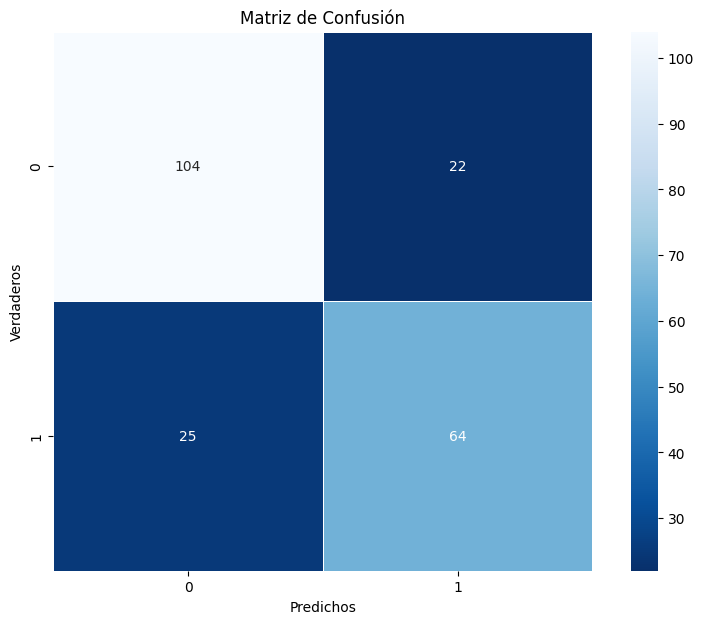

In [34]:
# Alumno, dibujar la matriz de confusion
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_hat)
# Dibujar la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Verdaderos')
plt.xlabel('Predichos')
plt.title('Matriz de Confusión')
plt.show()


# Utilizar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline6.png" width="1000" align="middle">

In [51]:
# Alumno, pona a prueba el modelo, ingrese datos ficticios y divertase un rato :)
# Recordar que los datos de genero (Sex) ahora son numéricos para el modelo (0 o 1)
# Debe utilizar el encoder que se generó antes para convertir los nuevos valores
# Ejemplo de datos ficticios
data_ficticio = {
    'Pclass': [3],
    'Sex': [1], # 1 para mujer, 0 para hombre
    'Age': [22],
    'SibSp': [1],
    'Parch': [0]
}

df_ficticio = pd.DataFrame(data_ficticio)

y_hat_ficticio = clf.predict(X_test)
y_hat_ficticio[0]

1